In [1]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the dataset
data = pd.read_csv('C:/Users/338561/Downloads/updated_pollution_dataset_2.csv',encoding='unicode_escape')
data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
1,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
2,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,Poor
3,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,Poor
4,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,Poor


In [3]:
data.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,30.021671,69.935576,20.057929,30.151482,26.399671,10.004471,1.500428,8.684212,497.283059
std,7.079486,16.402863,25.140063,28.294709,9.415399,7.111211,0.586232,3.778317,158.671435
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,24.700000,57.800000,4.500000,11.700000,19.500000,4.900000,1.010000,5.225000,376.000000
50%,28.700000,69.600000,11.600000,21.200000,25.000000,7.500000,1.310000,9.700000,494.000000
75%,34.500000,80.200000,25.600000,37.800000,32.500000,14.175000,1.930000,11.300000,601.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [4]:
data.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [5]:
data.shape

(4250, 10)

In [6]:
#CATEGORICAL VAL
categorical_cols = data.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['Air Quality'], dtype='object')


In [7]:
# NUMERICAL VAL
numerical_cols = data.select_dtypes(include=['int64','float64']).columns
print(numerical_cols)

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density'],
      dtype='object')


In [8]:
data.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

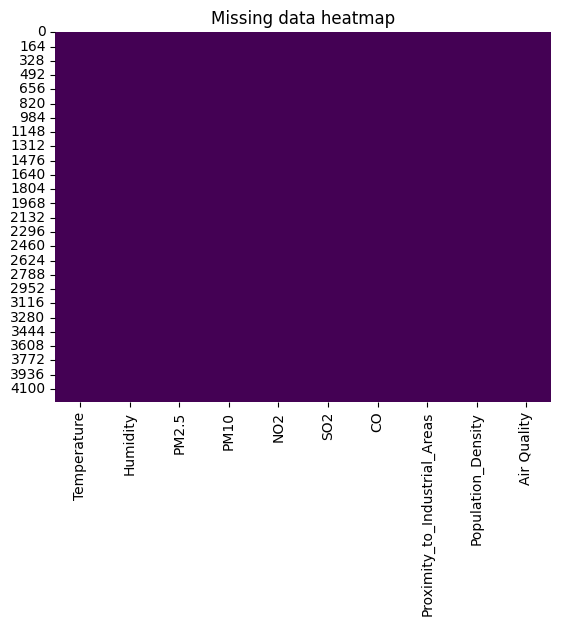

In [9]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing data heatmap")
plt.show()


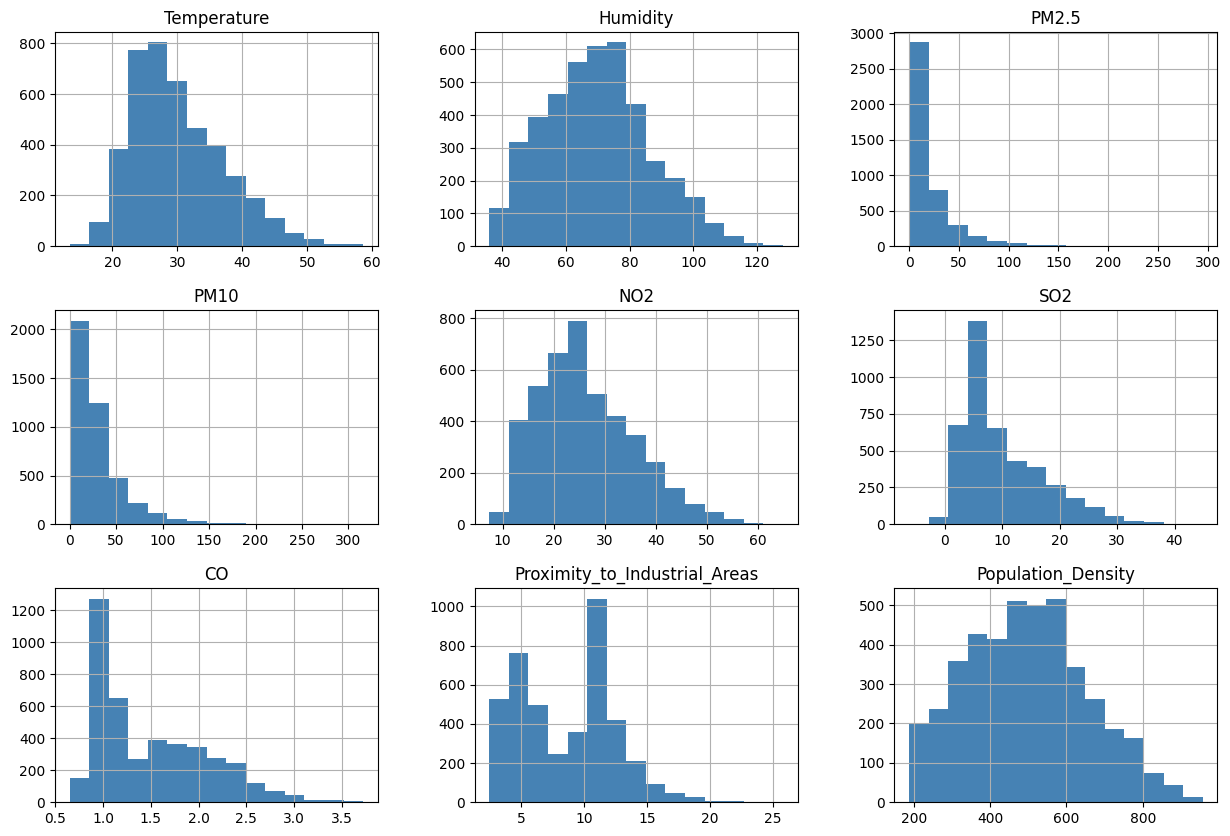

In [10]:
data.hist(bins=15, figsize=(15,10), color='steelblue')
plt.show()

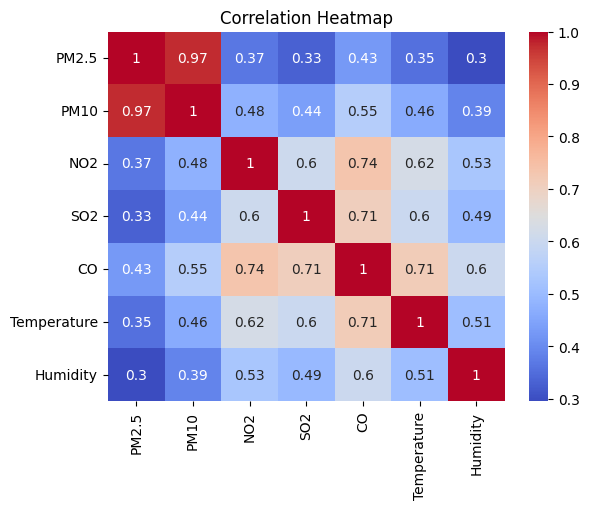

In [11]:
sns.heatmap(data[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO','Temperature', 'Humidity']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

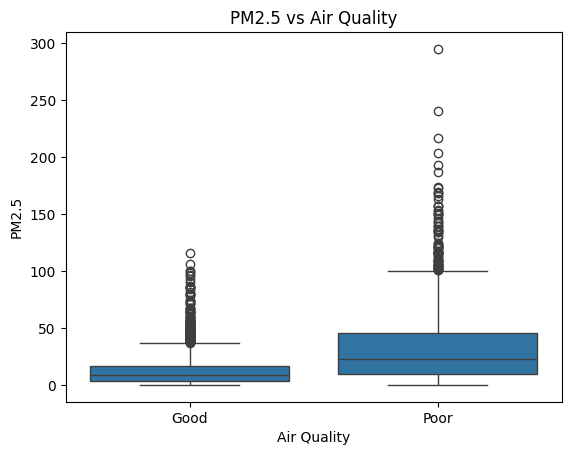

In [12]:
sns.boxplot(x='Air Quality', y='PM2.5', data=data)
plt.title("PM2.5 vs Air Quality")
plt.show()

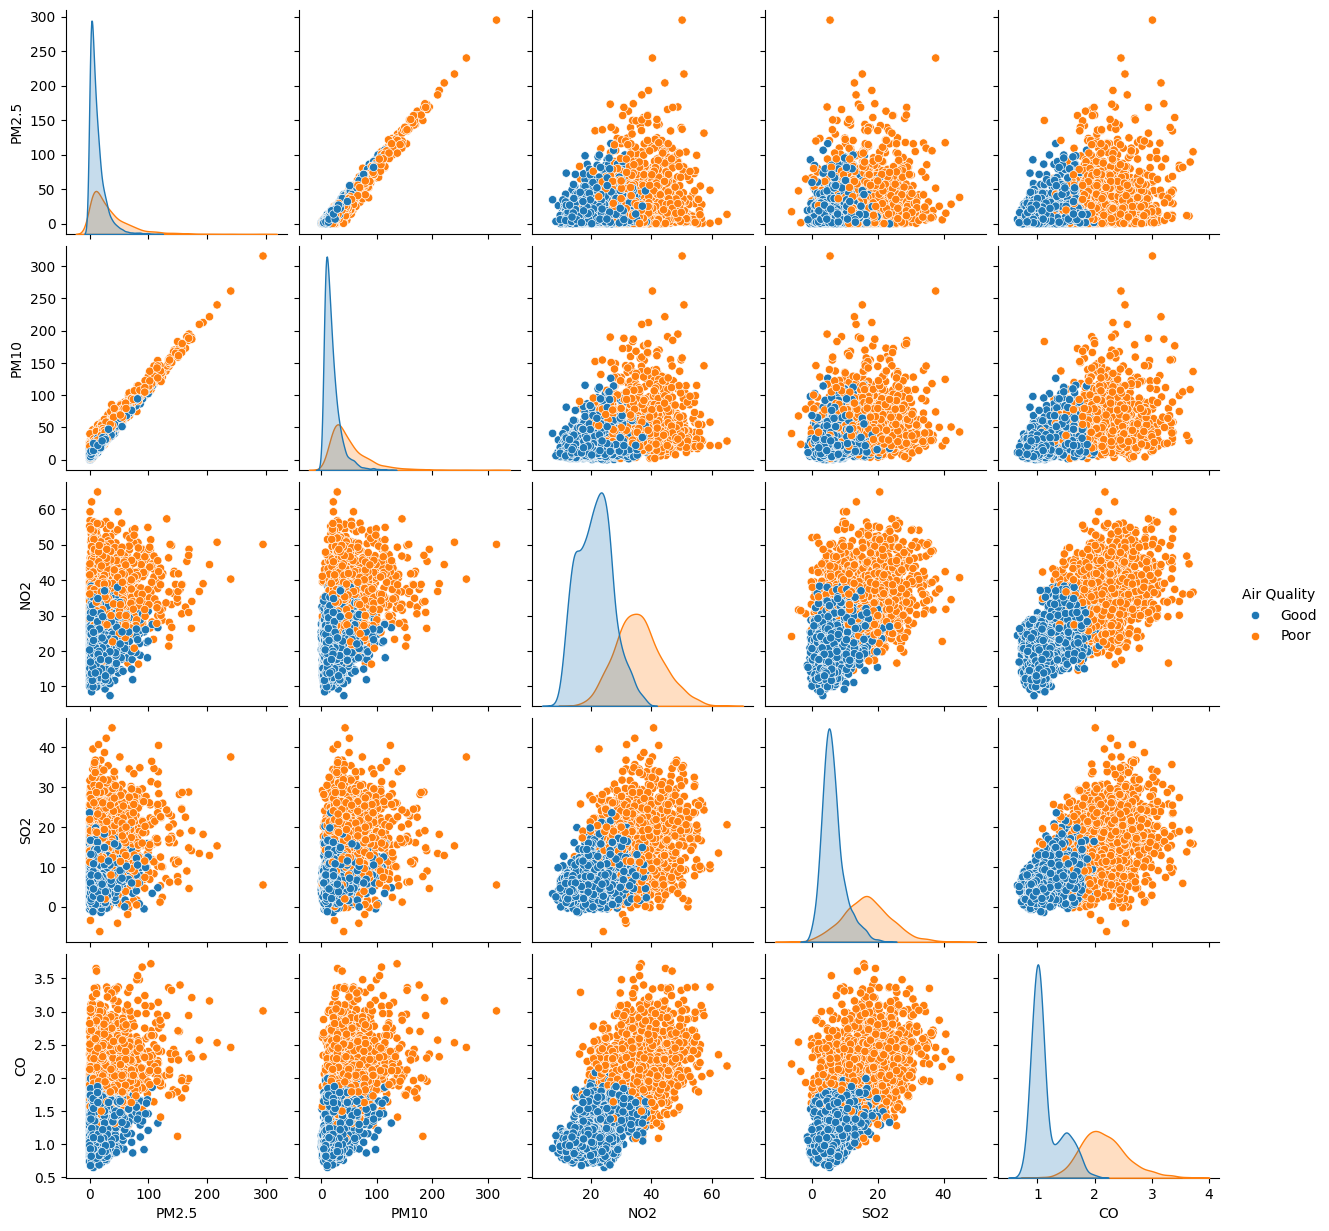

In [13]:
sns.pairplot(data, hue='Air Quality', vars=['PM2.5','PM10','NO2','SO2','CO'])
plt.show()

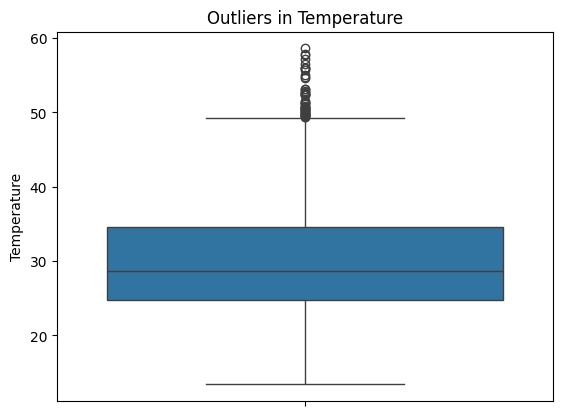

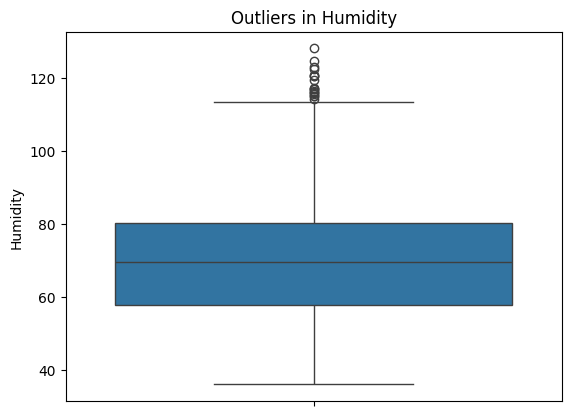

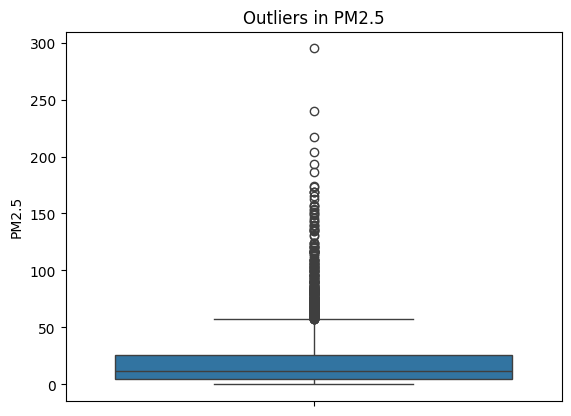

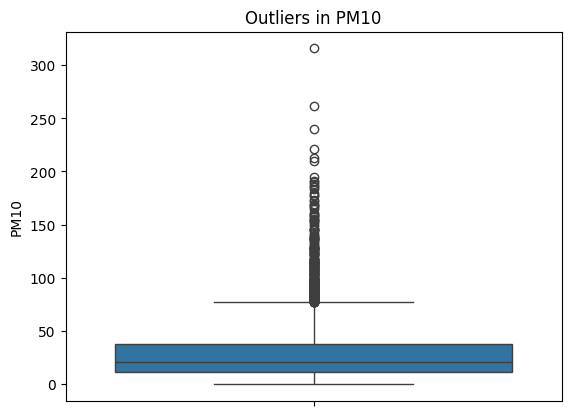

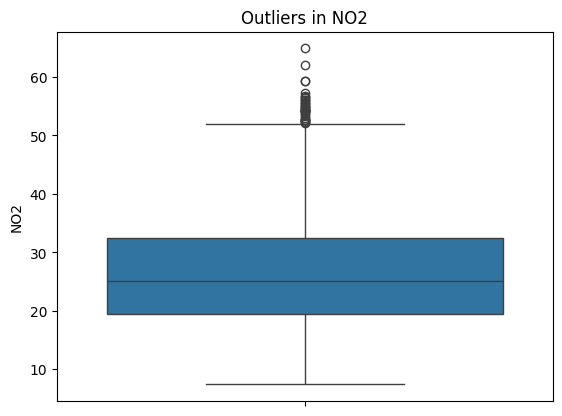

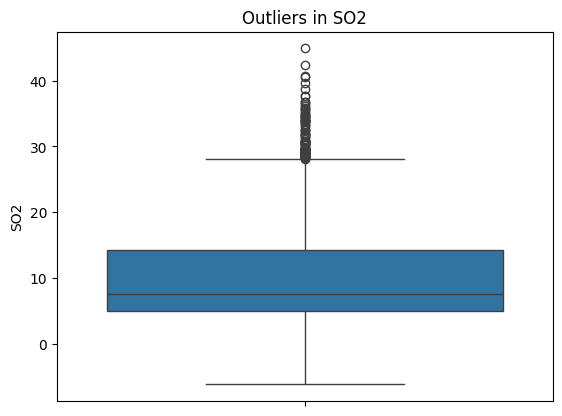

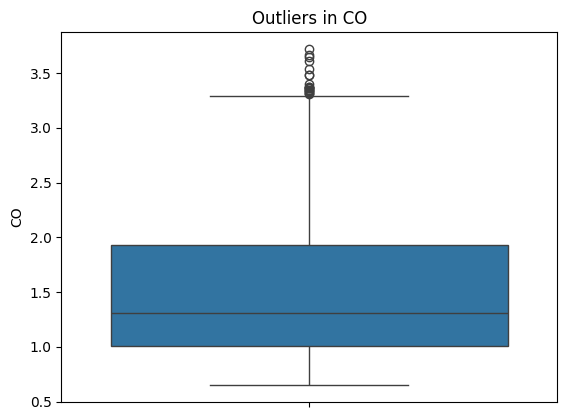

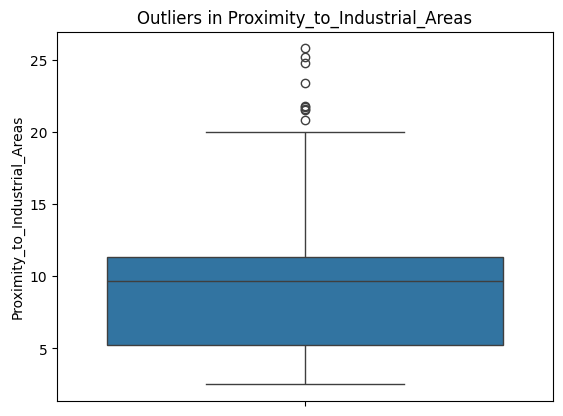

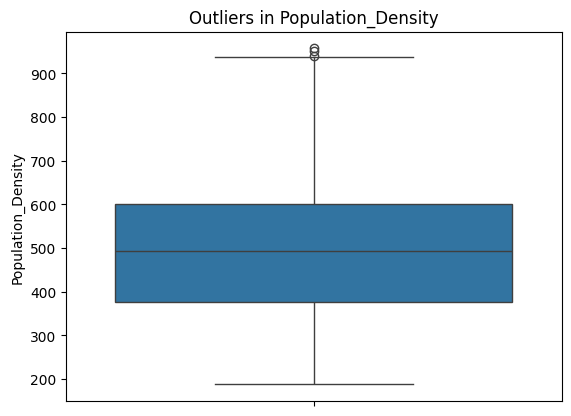

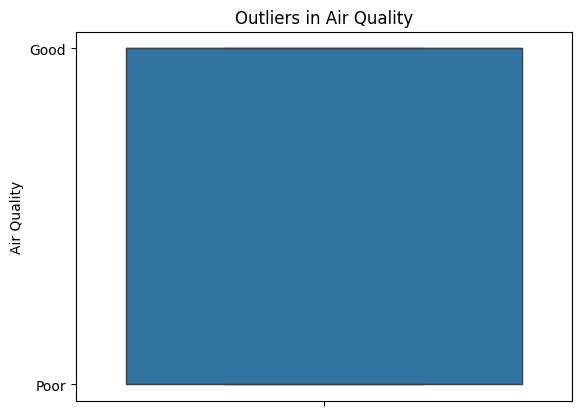

In [14]:
for col in data.columns:
    sns.boxplot(data[col])
    plt.title(f"Outliers in {col}")
    plt.show()

In [15]:
for col in ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
   

In [16]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
data['Air Quality'] = label_encoder.fit_transform(data['Air Quality'])


In [17]:
X = data.drop(['Air Quality'], axis=1)
y = data['Air Quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf  = RandomForestClassifier(random_state=42)
clf.fit(X_scaled, y)
importances = clf.feature_importances_
print(importances)

[0.08695642 0.02912214 0.00732243 0.01181993 0.18567024 0.11896345
 0.35215881 0.15609988 0.05188669]


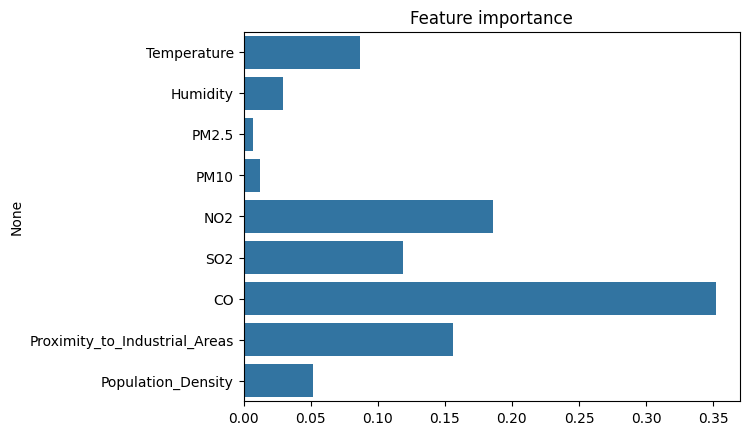

In [19]:
sns.barplot(x=importances, y=X.columns)
plt.title("Feature importance")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y , test_size=0.2, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

#predict on test set
y_pred = model.predict(X_test)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
#evaluate the model
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9776470588235294
[[547   7]
 [ 12 284]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       554
           1       0.98      0.96      0.97       296

    accuracy                           0.98       850
   macro avg       0.98      0.97      0.98       850
weighted avg       0.98      0.98      0.98       850



In [22]:
from sklearn.metrics import mean_squared_error
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

bias = np.mean((y_train - np.mean(train_predictions)) ** 2)
variance = np.var(train_predictions)

print(f"Bias: {bias}")
print(f"Variance: {variance}")

Bias: 0.22871833910034606
Variance: 0.22871833910034606


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'n_estimators': [50, 10, 20],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    random_state=42,
    n_jobs=1
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)
print("Best HyperParameters:", best_params)
print("Classification report: \n", classification_report(y_test, y_pred))


Best HyperParameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 20}
Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       554
           1       0.98      0.96      0.97       296

    accuracy                           0.98       850
   macro avg       0.98      0.97      0.97       850
weighted avg       0.98      0.98      0.98       850



In [24]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, classification_report, confusion_matrix

In [25]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(probability=True, random_state=42))
]

results = {}
for name, model in models:
    # train the model
    model.fit(X_train, y_train)

    # predict on the test set
    y_pred = model.predict(X_test)

    # evaluate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    # print the classification report
    print(f"Model: {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Model: Logistic Regression
[[547   7]
 [ 16 280]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       554
           1       0.98      0.95      0.96       296

    accuracy                           0.97       850
   macro avg       0.97      0.97      0.97       850
weighted avg       0.97      0.97      0.97       850

--------------------------------------------------
Model: Decision Tree
[[542  12]
 [ 17 279]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       554
           1       0.96      0.94      0.95       296

    accuracy                           0.97       850
   macro avg       0.96      0.96      0.96       850
weighted avg       0.97      0.97      0.97       850

--------------------------------------------------
Model: Random Forest
[[547   7]
 [ 12 284]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       5

In [26]:
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
for model, acc in sorted_results:
    print(f"{model} : Accuracy = {acc:.3f}")

best_model = sorted_results[0][0]

Random Forest : Accuracy = 0.978
Gradient Boosting : Accuracy = 0.975
Logistic Regression : Accuracy = 0.973
Support Vector Machine : Accuracy = 0.973
Decision Tree : Accuracy = 0.966


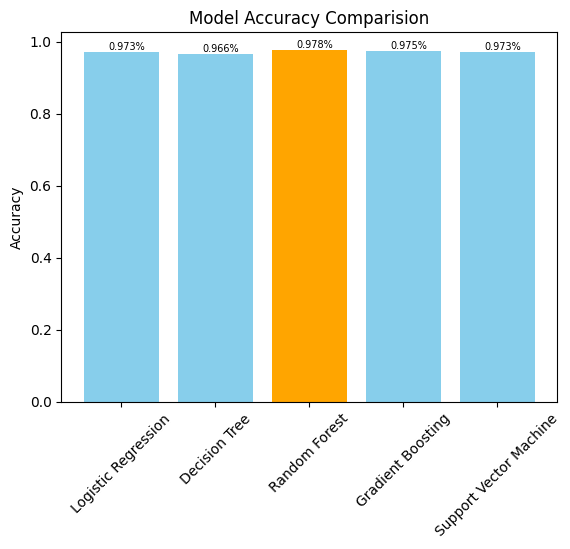

In [27]:
# visualise the model performance
colors = ['orange' if model == best_model else 'skyblue' for model in results.keys()]
bars = plt.bar(results.keys(), results.values(), color=colors)
for bar, acc in zip(bars, results.values()):
    plt.text(bar.get_x() + bar.get_width() / 3, bar.get_height() + 0.005, f"{acc:.3f}%", fontsize = 7)

#plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Model Accuracy Comparision')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

In [28]:
import joblib
joblib.dump(model, "model1.pkl")

['model1.pkl']